<a href="https://colab.research.google.com/github/BhagyaRekhaSunkavalli/AI-ML/blob/main/AI_ML_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [13]:
df = pd.read_csv("/content/breast-cancer.csv")
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.iloc[:, 2:4]
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train_scaled, y_train)

svm_rbf = SVC(kernel="rbf", C=1, gamma=0.1)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print(f"Linear SVM Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")
print(f"RBF SVM Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")

Linear SVM Accuracy: 0.90
RBF SVM Accuracy: 0.91


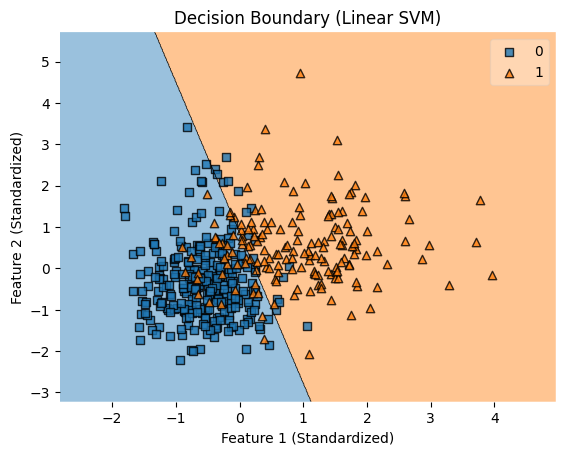

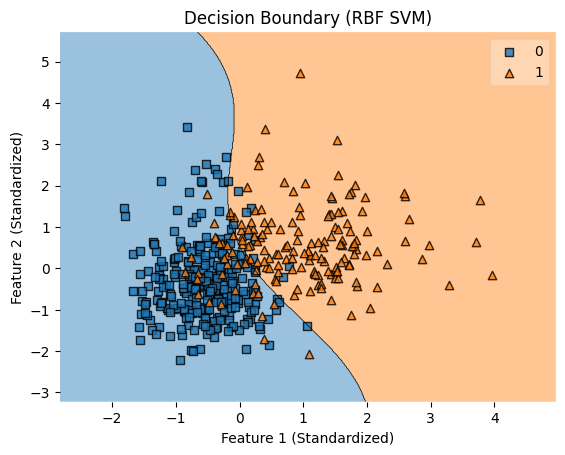

In [ ]:
plot_decision_regions(X_train_scaled, y_train.to_numpy(), clf=svm_linear)
plt.title("Decision Boundary (Linear SVM)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()

plot_decision_regions(X_train_scaled, y_train.to_numpy(), clf=svm_rbf)
plt.title("Decision Boundary (RBF SVM)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.show()

In [ ]:
c_values = [0.1, 1, 10]
for c in c_values:
    svm_rbf_tuned = SVC(kernel="rbf", C=c, gamma=0.1)
    scores = cross_val_score(svm_rbf_tuned, X_train_scaled, y_train, cv=5)
    print(f"C = {c}, Cross-validation accuracy: {np.mean(scores):.2f}")

C = 0.1, Cross-validation accuracy: 0.88
C = 1, Cross-validation accuracy: 0.89
C = 10, Cross-validation accuracy: 0.90
